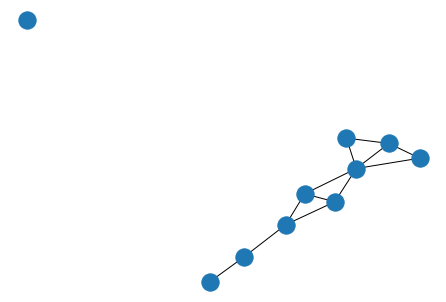

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
import random
from time import time
import math

betaJ = 0.8
colorDict = {-1: "red", 1: "blue"}
N = 10000

G = nx.fast_gnp_random_graph(10, 0.2)
nx.draw(G)

4.19 µs ± 300 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.65 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [165]:
timeDict = {}

for N in range(10,3000,100):
    temp = []
    for _ in range(3):
        time1 = time()
        G = nx.fast_gnp_random_graph(10, 0.2)
        for i in range(N):
            degDist = [ G.degree[x] for x in G.nodes]
            q = random.choices(list(G.nodes), weights = degDist)
            G.add_edge(max(G.nodes)+1,q[0])
        temp.append(time()-time1)
    timeDict[N] = temp

KeyboardInterrupt: 

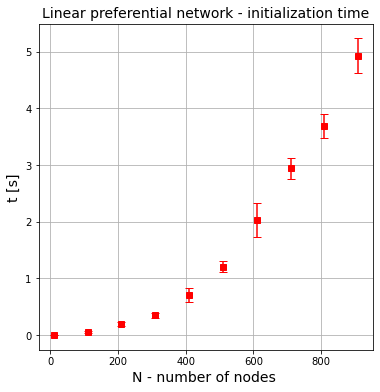

In [164]:
plt.figure(figsize=[6,6])
plt.errorbar(timeDict.keys(), np.array(list(timeDict.values())).mean(axis=1), yerr = np.array(list(timeDict.values())).std(axis=1), capsize=4, marker="s", ls = "", color ="red")
plt.title("Linear preferential network - initialization time",size=14)
plt.xlabel("N - number of nodes ", size=14)
plt.ylabel("t [s]",size=14)

plt.grid()

In [2]:
def linPrefNet(N):
    G = nx.fast_gnp_random_graph(10, 0.2)

    for i in range(N-10):
        degDist = [ G.degree[x] for x in G.nodes]
        q = random.choices(list(G.nodes), weights = degDist)
        G.add_edge(max(G.nodes)+1,q[0])

    return G

def powPrefNet(N, power):
    G = nx.fast_gnp_random_graph(10, 0.2)

    for i in range(N-10):
        degDist = np.array([ G.degree[x] for x in G.nodes])
        q = np.random.choice(list(G.nodes), p = degDist**power / sum(degDist**power))
        G.add_edge(max(G.nodes)+1,q[0])

    return G

In [179]:
qqq = linPrefNet(1200)
degDist = [ qqq.degree[x] for x in qqq.nodes]
np.array(degDist)**2

array([   0,  784, 1156, ...,    1,    1,    1], dtype=int32)

In [12]:
class IsingNet:
    def __init__(self, G):
        self.G = G
        self.N = len(G.nodes)
        self.spins = np.random.choice([-1,1], size = self.N)

    def oneStep(self):
        toFlip = random.choice(range(self.N))[0]
        dEnergy = self.calcEnergy(toFlip)

        if dEnergy <= 0:
            self.spins[toFlip] *= -1 #certrainly flip a spin

        elif random.random() > math.exp(-self.beta * dEnergy):
            self.spins[toFlip] *= -1
    

    def calcEnergy(self,toFlip):
        neighbours = list(self.G.adj[ toFlip ])
        dEnergy = 2 * self.spins[toFlip] * ( self.spins[neighbours].sum() )
        return dEnergy

In [4]:
Graph = linPrefNet(100)

In [36]:
ising_net = IsingNet(Graph)

toFlip = random.choice(range(ising_net.N))
neighbours = list(ising_net.G.adj[ toFlip ])

In [40]:
ising_net.kutya

AttributeError: 'IsingNet' object has no attribute 'kutya'

In [158]:
np.random.choice( np.arange(len(G.nodes)) )

478 µs ± 29.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
96.4 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [63]:
%timeit G.add_edge(10,q[0])

1.85 µs ± 610 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [62]:
%timeit degDist = [ G.degree[x] for x in G.nodes]
%timeit q = random.choices(list(G.nodes), weights = degDist)
%timeit G.add_edge(10,q[0])

26.2 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


ValueError: The number of weights does not match the population

In [43]:
G.add_edges_from([max(G.nodes)+1,q])

NameError: name 'q' is not defined

In [41]:
G.add_edges_from([max(G.nodes)+1,q])

NameError: name 'q' is not defined